In [1]:
#Import the necessary libraries
import json 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Data Cleaning

In [2]:
#Read the CSV Files
df_global_power_plants=pd.read_csv('global_power_plant_database_last.csv')
df_energy_consumption=pd.read_csv('Primary-energy-consumption-from-fossilfuels-nuclear-renewables.csv')
df_elec_production=pd.read_csv('share-elec-produc-by-source.csv')
df_emissions=pd.read_csv('annual-co2-emissions-per-country-2.csv')
df_mineral_ores=pd.read_csv('Mineral_ores_round_the_world.csv')

/var/folders/qy/g8t0xs116mgdb7czqbzt0mf40000gn/T/ipykernel_41692/4023211143.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_global_power_plants=pd.read_csv('global_power_plant_database_last.csv')
/var/folders/qy/g8t0xs116mgdb7czqbzt0mf40000gn/T/ipykernel_41692/4023211143.py:6: DtypeWarning: Columns (13,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df_mineral_ores=pd.read_csv('Mineral_ores_round_the_world.csv')


# Cleaning the DataFrame of Powerplants

In [3]:
df_global_power_plants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34936 entries, 0 to 34935
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         34936 non-null  object 
 1   country_long                    34936 non-null  object 
 2   name                            34936 non-null  object 
 3   gppd_idnr                       34936 non-null  object 
 4   capacity_mw                     34936 non-null  float64
 5   latitude                        34936 non-null  float64
 6   longitude                       34936 non-null  float64
 7   primary_fuel                    34936 non-null  object 
 8   other_fuel1                     1944 non-null   object 
 9   other_fuel2                     276 non-null    object 
 10  other_fuel3                     92 non-null     object 
 11  commissioning_year              17447 non-null  float64
 12  owner                           

In [4]:
df_global_power_plants.head()

country country_long                                              name  \
0     AFG  Afghanistan      Kajaki Hydroelectric Power Plant Afghanistan   
1     AFG  Afghanistan                                      Kandahar DOG   
2     AFG  Afghanistan                                      Kandahar JOL   
3     AFG  Afghanistan     Mahipar Hydroelectric Power Plant Afghanistan   
4     AFG  Afghanistan  Naghlu Dam Hydroelectric Power Plant Afghanistan   

      gppd_idnr  capacity_mw  latitude  longitude primary_fuel other_fuel1  \
0  GEODB0040538         33.0    32.322    65.1190        Hydro         NaN   
1    WKS0070144         10.0    31.670    65.7950        Solar         NaN   
2    WKS0071196         10.0    31.623    65.7920        Solar         NaN   
3  GEODB0040541         66.0    34.556    69.4787        Hydro         NaN   
4  GEODB0040534        100.0    34.641    69.7170        Hydro         NaN   

  other_fuel2  ... estimated_generation_gwh_2013  \
0         NaN  ...                        123.77   
1         NaN  ...                         18.43   
2         NaN  ...                         18.64   
3         NaN  ...                        225.06   
4         NaN  ...                        406.16   

   estimated_generation_gwh_2014 estimated_generation_gwh_2015  \
0                         162.90                         97.39   
1                          17.48                         18.25   
2                          17.58                         19.10   
3                         203.55                        146.90   
4                         357.22                        270.99   

  estimated_generation_gwh_2016 estimated_generation_gwh_2017  \
0                        137.76                        119.50   
1                         17.70                         18.29   
2                         17.62                         18.72   
3                        230.18                        174.91   
4                        395.38                        350.80   

  estimated_generation_note_2013 estimated_generation_note_2014  \
0                       HYDRO-V1                       HYDRO-V1   
1                SOLAR-V1-NO-AGE                SOLAR-V1-NO-AGE   
2                SOLAR-V1-NO-AGE                SOLAR-V1-NO-AGE   
3                       HYDRO-V1                       HYDRO-V1   
4                       HYDRO-V1                       HYDRO-V1   

   estimated_generation_note_2015  estimated_generation_note_2016  \
0                        HYDRO-V1                        HYDRO-V1   
1                 SOLAR-V1-NO-AGE                 SOLAR-V1-NO-AGE   
2                 SOLAR-V1-NO-AGE                 SOLAR-V1-NO-AGE   
3                        HYDRO-V1                        HYDRO-V1   
4                        HYDRO-V1                        HYDRO-V1   

   estimated_generation_note_2017  
0                        HYDRO-V1  
1                 SOLAR-V1-NO-AGE  
2                 SOLAR-V1-NO-AGE  
3                        HYDRO-V1  
4                        HYDRO-V1  

[5 rows x 36 columns]

In [5]:
#Drop the columns that we are not use in our analysis
df_global_power_plants.drop(columns=['estimated_generation_note_2013','estimated_generation_note_2014','estimated_generation_note_2015','estimated_generation_note_2016','estimated_generation_note_2017'],inplace=True)
df_global_power_plants.drop(columns=['source','url','geolocation_source'],inplace=True)
df_global_power_plants.drop(columns=['other_fuel2','other_fuel3'],inplace=True)
df_global_power_plants.drop(columns=['wepp_id'],inplace=True)
df_global_power_plants.drop(columns=['generation_data_source'],inplace=True)

In [6]:
#Unique elements of "country_long" column.
df_global_power_plants['country_long'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antarctica',
       'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       'Bahrain', 'Bangladesh', 'Belarus', 'Belgium', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Central African Republic', 'Chile', 'China', 'Colombia', 'Congo',
       'Costa Rica', 'Cote DIvoire', 'Croatia', 'Cuba', 'Cyprus',
       'Czech Republic', 'Democratic Republic of the Congo', 'Denmark',
       'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'French Guiana', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guinea-Bissau', 'Guyana', 'Honduras', 'Hungary',
       'Iceland', 'India', 'Indonesia', 'Iran', 'Ira

In [7]:
#Create a dictionairy whose key-values is the categorization of our countries in level of continents 
regions = {
    "Asia": [
        "Afghanistan", "Armenia", "Azerbaijan", "Bahrain", "Bangladesh", "Bhutan", "Brunei Darussalam", 
        "Cambodia", "China", "Cyprus", "Georgia", "India", "Indonesia", "Iran", "Iraq", "Israel", 
        "Japan", "Jordan", "Kazakhstan", "Kuwait", "Kyrgyzstan", "Laos", "Lebanon", "Malaysia", 
        "Maldives", "Mongolia", "Myanmar", "Nepal", "North Korea", "Oman", "Pakistan", "Palestine", 
        "Philippines", "Qatar", "Saudi Arabia", "Singapore", "South Korea", "Sri Lanka", "Syria", 
        "Tajikistan", "Thailand", "Timor-Leste", "Turkey", "Turkmenistan", "United Arab Emirates", 
        "Uzbekistan", "Vietnam", "Yemen","Syrian Arab Republic","Taiwan","Western Sahara"
    ],
    "Europe": [
        "Albania", "Austria", "Belarus", "Belgium", "Bosnia and Herzegovina", "Bulgaria", "Croatia", 
        "Czech Republic", "Denmark", "Estonia", "Finland", "France", "Germany", "Greece", "Hungary", 
        "Iceland", "Ireland", "Italy", "Kosovo", "Latvia", "Lithuania", "Luxembourg", "Macedonia", 
        "Moldova", "Montenegro", "Netherlands", "Norway", "Poland", "Portugal", "Romania", "Russia", 
        "Serbia", "Slovakia", "Slovenia", "Spain", "Sweden", "Switzerland", "Ukraine", "United Kingdom"
    ],
    "Africa": [
        "Algeria", "Angola", "Benin", "Botswana", "Burkina Faso", "Burundi", "Cameroon", "Cape Verde", 
        "Central African Republic", "Chad", "Comoros", "Congo", "Djibouti", "Egypt", "Equatorial Guinea", 
        "Eritrea", "Eswatini", "Ethiopia", "Gabon", "Gambia", "Ghana", "Guinea", "Guinea-Bissau", 
        "Ivory Coast", "Kenya", "Lesotho", "Liberia", "Libya", "Madagascar", "Malawi", "Mali", 
        "Mauritania", "Mauritius", "Morocco", "Mozambique", "Namibia", "Niger", "Nigeria", "Rwanda", 
        "Sao Tome and Principe", "Senegal", "Seychelles", "Sierra Leone", "Somalia", "South Africa", 
        "South Sudan", "Sudan", "Tanzania", "Togo", "Tunisia", "Uganda", "Zambia", "Zimbabwe","Cote DIvoire","Democratic Republic of the Congo","Swaziland"
    ],
    "North America": [
        "Canada", "United States of America", "Mexico", "Jamaica", "Honduras", "Guatemala", "Cuba", 
        "Panama", "Costa Rica", "El Salvador", "Bahamas", "Barbados", "Dominican Republic", "Haiti", 
        "Saint Kitts and Nevis", "Saint Lucia", "Saint Vincent and the Grenadines", "Trinidad and Tobago","Nicaragua"
    ],
"South America": [
        "Argentina", "Bolivia", "Brazil", "Chile", "Colombia", "Ecuador", "Guyana", "Paraguay", 
        "Peru", "Suriname", "Uruguay", "Venezuela","French Guiana"
    ],
"Oceania": [
        "Australia", "Fiji", "Kiribati", "Marshall Islands", "Micronesia", "Nauru", "New Zealand", 
        "Palau", "Papua New Guinea", "Samoa", "Solomon Islands", "Tonga", "Tuvalu", "Vanuatu"
    ]
,
"Antarctica":["Antarctica"]
}

In [8]:
#Make a function that filters every country of the "country_long" column,gives the continent that is contained and put it in order in a new list.
continents_global_powerplants=[]
for country in df_global_power_plants['country_long']:
    for key,value in regions.items():
        if country in value:
            continents_global_powerplants.append(key)

In [9]:
#Insert a new column in DataFrame that contains the continent,based on the list that we made.
df_global_power_plants['continent']=continents_global_powerplants
#Print the new DataFrame
df_global_power_plants.head()

country country_long                                              name  \
0     AFG  Afghanistan      Kajaki Hydroelectric Power Plant Afghanistan   
1     AFG  Afghanistan                                      Kandahar DOG   
2     AFG  Afghanistan                                      Kandahar JOL   
3     AFG  Afghanistan     Mahipar Hydroelectric Power Plant Afghanistan   
4     AFG  Afghanistan  Naghlu Dam Hydroelectric Power Plant Afghanistan   

      gppd_idnr  capacity_mw  latitude  longitude primary_fuel other_fuel1  \
0  GEODB0040538         33.0    32.322    65.1190        Hydro         NaN   
1    WKS0070144         10.0    31.670    65.7950        Solar         NaN   
2    WKS0071196         10.0    31.623    65.7920        Solar         NaN   
3  GEODB0040541         66.0    34.556    69.4787        Hydro         NaN   
4  GEODB0040534        100.0    34.641    69.7170        Hydro         NaN   

   commissioning_year  ... generation_gwh_2016  generation_gwh_2017  \
0                 NaN  ...                 NaN                  NaN   
1                 NaN  ...                 NaN                  NaN   
2                 NaN  ...                 NaN                  NaN   
3                 NaN  ...                 NaN                  NaN   
4                 NaN  ...                 NaN                  NaN   

   generation_gwh_2018  generation_gwh_2019  estimated_generation_gwh_2013  \
0                  NaN                  NaN                         123.77   
1                  NaN                  NaN                          18.43   
2                  NaN                  NaN                          18.64   
3                  NaN                  NaN                         225.06   
4                  NaN                  NaN                         406.16   

   estimated_generation_gwh_2014  estimated_generation_gwh_2015  \
0                         162.90                          97.39   
1                          17.48                          18.25   
2                          17.58                          19.10   
3                         203.55                         146.90   
4                         357.22                         270.99   

   estimated_generation_gwh_2016  estimated_generation_gwh_2017  continent  
0                         137.76                         119.50       Asia  
1                          17.70                          18.29       Asia  
2                          17.62                          18.72       Asia  
3                         230.18                         174.91       Asia  
4                         395.38                         350.80       Asia  

[5 rows x 25 columns]

In [10]:
#Make a dictionairy that key-values is a general categorization of "primary_fuel" elements.
energy_sources = {
    "Fossil Fuels": ["Gas", "Oil", "Coal", "Petcoke"],
    "Nuclear": ["Nuclear"],
    "Renewables": 
       [ "Hydro", "Solar", "Wind", "Waste", "Biomass", 
        "Wave and Tidal", "Geothermal"],
"Other": ["Other", "Storage", "Cogeneration" ]
} 

In [11]:
#Filters the "primary_fuel" column to see in which general fuel category (key) of energy_sources dictionairy contained.
energy_type=[]
for source in df_global_power_plants['primary_fuel']:
    for key,value in energy_sources.items():
        if source in value:
            energy_type.append(key)

In [12]:
#Insert a new column in DataFrame that contains the general fuel category, based on the list that we made.
df_global_power_plants['energy_type']=energy_type
#Print the new DataFrame
df_global_power_plants.head()

country country_long                                              name  \
0     AFG  Afghanistan      Kajaki Hydroelectric Power Plant Afghanistan   
1     AFG  Afghanistan                                      Kandahar DOG   
2     AFG  Afghanistan                                      Kandahar JOL   
3     AFG  Afghanistan     Mahipar Hydroelectric Power Plant Afghanistan   
4     AFG  Afghanistan  Naghlu Dam Hydroelectric Power Plant Afghanistan   

      gppd_idnr  capacity_mw  latitude  longitude primary_fuel other_fuel1  \
0  GEODB0040538         33.0    32.322    65.1190        Hydro         NaN   
1    WKS0070144         10.0    31.670    65.7950        Solar         NaN   
2    WKS0071196         10.0    31.623    65.7920        Solar         NaN   
3  GEODB0040541         66.0    34.556    69.4787        Hydro         NaN   
4  GEODB0040534        100.0    34.641    69.7170        Hydro         NaN   

   commissioning_year  ... generation_gwh_2017  generation_gwh_2018  \
0                 NaN  ...                 NaN                  NaN   
1                 NaN  ...                 NaN                  NaN   
2                 NaN  ...                 NaN                  NaN   
3                 NaN  ...                 NaN                  NaN   
4                 NaN  ...                 NaN                  NaN   

   generation_gwh_2019  estimated_generation_gwh_2013  \
0                  NaN                         123.77   
1                  NaN                          18.43   
2                  NaN                          18.64   
3                  NaN                         225.06   
4                  NaN                         406.16   

   estimated_generation_gwh_2014  estimated_generation_gwh_2015  \
0                         162.90                          97.39   
1                          17.48                          18.25   
2                          17.58                          19.10   
3                         203.55                         146.90   
4                         357.22                         270.99   

   estimated_generation_gwh_2016  estimated_generation_gwh_2017  continent  \
0                         137.76                         119.50       Asia   
1                          17.70                          18.29       Asia   
2                          17.62                          18.72       Asia   
3                         230.18                         174.91       Asia   
4                         395.38                         350.80       Asia   

   energy_type  
0   Renewables  
1   Renewables  
2   Renewables  
3   Renewables  
4   Renewables  

[5 rows x 26 columns]

# Cleaning the Energy Consumption DataFrame

In [13]:
df_energy_consumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4284 entries, 0 to 4283
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Entity                       4284 non-null   object 
 1   Code                         4119 non-null   object 
 2   Year                         4284 non-null   int64  
 3   Fossil fuels (% sub energy)  4284 non-null   float64
 4   Renewables (% sub energy)    4284 non-null   float64
 5   Nuclear (% sub energy)       4284 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 200.9+ KB


In [14]:
df_energy_consumption.head()

Entity Code  Year  Fossil fuels (% sub energy)  Renewables (% sub energy)  \
0  Africa  NaN  1965                       94.463                      5.537   
1  Africa  NaN  1966                       94.127                      5.873   
2  Africa  NaN  1967                       93.920                      6.080   
3  Africa  NaN  1968                       93.257                      6.743   
4  Africa  NaN  1969                       92.317                      7.683   

   Nuclear (% sub energy)  
0                     0.0  
1                     0.0  
2                     0.0  
3                     0.0  
4                     0.0

In [15]:
#Round the elements of specified float type columns.
df_energy_consumption['Fossil fuels (% sub energy)']=df_energy_consumption['Fossil fuels (% sub energy)'].round(2)
df_energy_consumption['Renewables (% sub energy)']=df_energy_consumption['Renewables (% sub energy)'].round(2)
df_energy_consumption['Nuclear (% sub energy)']=df_energy_consumption['Nuclear (% sub energy)'].round(2)

In [16]:
df_energy_consumption.head()

Entity Code  Year  Fossil fuels (% sub energy)  Renewables (% sub energy)  \
0  Africa  NaN  1965                        94.46                       5.54   
1  Africa  NaN  1966                        94.13                       5.87   
2  Africa  NaN  1967                        93.92                       6.08   
3  Africa  NaN  1968                        93.26                       6.74   
4  Africa  NaN  1969                        92.32                       7.68   

   Nuclear (% sub energy)  
0                     0.0  
1                     0.0  
2                     0.0  
3                     0.0  
4                     0.0

In [17]:
#We keep only from the "Entity" column that has specified entries that we interested for our analysis.
df_energy_consumption=df_energy_consumption[(df_energy_consumption['Entity']!='Europe') & (df_energy_consumption['Entity']!='North America') & (df_energy_consumption['Entity']!='Africa')]

In [18]:
#Create a dictionairy whose key-values is the categorization of our countries in level of continents
regions= {
    "Asia": [
        "Afghanistan", "Armenia", "Azerbaijan", "Bahrain", "Bangladesh", "Bhutan", "Brunei Darussalam", 
        "Cambodia", "China", "Cyprus", "Georgia", "India", "Indonesia", "Iran", "Iraq", "Israel", 
        "Japan", "Jordan", "Kazakhstan", "Kuwait", "Kyrgyzstan", "Laos", "Lebanon", "Malaysia", 
        "Maldives", "Mongolia", "Myanmar", "Nepal", "North Korea", "Oman", "Pakistan", "Palestine", 
        "Philippines", "Qatar", "Saudi Arabia", "Singapore", "South Korea", "Sri Lanka", "Syria", 
        "Tajikistan", "Thailand", "Timor-Leste", "Turkey", "Turkmenistan", "United Arab Emirates", 
        "Uzbekistan", "Vietnam", "Yemen","Syrian Arab Republic","Taiwan","Western Sahara","Hong Kong"
    ],
    "Europe": [
        "Albania", "Austria", "Belarus", "Belgium", "Bosnia and Herzegovina", "Bulgaria", "Croatia", 
        "Czech Republic", "Denmark", "Estonia", "Finland", "France", "Germany", "Greece", "Hungary", 
        "Iceland", "Ireland", "Italy", "Kosovo", "Latvia", "Lithuania", "Luxembourg", "Macedonia", 
        "Moldova", "Montenegro", "Netherlands", "Norway", "Poland", "Portugal", "Romania", "Russia", 
        "Serbia", "Slovakia", "Slovenia", "Spain", "Sweden", "Switzerland", "Ukraine", "United Kingdom","Czechia","North Macedonia"
    ],
    "Africa": [
        "Algeria", "Angola", "Benin", "Botswana", "Burkina Faso", "Burundi", "Cameroon", "Cape Verde", 
        "Central African Republic", "Chad", "Comoros", "Congo", "Djibouti", "Egypt", "Equatorial Guinea", 
        "Eritrea", "Eswatini", "Ethiopia", "Gabon", "Gambia", "Ghana", "Guinea", "Guinea-Bissau", 
        "Ivory Coast", "Kenya", "Lesotho", "Liberia", "Libya", "Madagascar", "Malawi", "Mali", 
        "Mauritania", "Mauritius", "Morocco", "Mozambique", "Namibia", "Niger", "Nigeria", "Rwanda", 
        "Sao Tome and Principe", "Senegal", "Seychelles", "Sierra Leone", "Somalia", "South Africa", 
        "South Sudan", "Sudan", "Tanzania", "Togo", "Tunisia", "Uganda", "Zambia", "Zimbabwe","Cote DIvoire","Democratic Republic of the Congo","Swaziland"
    ],
    "North America": [
        "Canada", "United States of America", "Mexico", "Jamaica", "Honduras", "Guatemala", "Cuba", 
        "Panama", "Costa Rica", "El Salvador", "Bahamas", "Barbados", "Dominican Republic", "Haiti", 
        "Saint Kitts and Nevis", "Saint Lucia", "Saint Vincent and the Grenadines", "Trinidad and Tobago","Nicaragua","United States"
    ],
"South America": [
        "Argentina", "Bolivia", "Brazil", "Chile", "Colombia", "Ecuador", "Guyana", "Paraguay", 
        "Peru", "Suriname", "Uruguay", "Venezuela","French Guiana"
    ],
"Oceania": [
        "Australia", "Fiji", "Kiribati", "Marshall Islands", "Micronesia", "Nauru", "New Zealand", 
        "Palau", "Papua New Guinea", "Samoa", "Solomon Islands", "Tonga", "Tuvalu", "Vanuatu"
    ]
,
"Antarctica":["Antarctica"]
    ,
    "World":["World"]
}

In [19]:
#We filter the elements of "Entity" column,gives the continent that is contained and put it in order in a new list.
continents_energy_consumption=[]
for country in df_energy_consumption['Entity']:
    for key,value in regions.items():
        if country in value:
            continents_energy_consumption.append(key)

In [20]:
#Insert a new column in DataFrame that contains the continent,based on the list that we made.
df_energy_consumption['Continent']=continents_energy_consumption
#Print the new DataFrame
df_energy_consumption

Entity      Code  Year  Fossil fuels (% sub energy)  \
55    Algeria       DZA  1965                        95.51   
56    Algeria       DZA  1966                        96.69   
57    Algeria       DZA  1967                        95.96   
58    Algeria       DZA  1968                        94.83   
59    Algeria       DZA  1969                        97.00   
...       ...       ...   ...                          ...   
4279    World  OWID_WRL  2015                        85.84   
4280    World  OWID_WRL  2016                        85.46   
4281    World  OWID_WRL  2017                        85.12   
4282    World  OWID_WRL  2018                        84.85   
4283    World  OWID_WRL  2019                        84.32   

      Renewables (% sub energy)  Nuclear (% sub energy) Continent  
55                         4.49                    0.00    Africa  
56                         3.31                    0.00    Africa  
57                         4.04                    0.00    Africa  
58                         5.17                    0.00    Africa  
59                         3.00                    0.00    Africa  
...                         ...                     ...       ...  
4279                       9.84                    4.32     World  
4280                      10.24                    4.30     World  
4281                      10.64                    4.24     World  
4282                      10.96                    4.19     World  
4283                      11.41                    4.27     World  

[4119 rows x 7 columns]

# Cleaning the Electricity Production DataFrame

In [21]:
df_elec_production.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6190 entries, 0 to 6189
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Entity                            6190 non-null   object 
 1   Code                              5423 non-null   object 
 2   Year                              6190 non-null   int64  
 3   Coal (% electricity)              5170 non-null   float64
 4   Gas (% electricity)               5170 non-null   float64
 5   Hydro (% electricity)             6190 non-null   float64
 6   Solar (% electricity)             6190 non-null   float64
 7   Wind (% electricity)              6190 non-null   float64
 8   Oil (% electricity)               5170 non-null   float64
 9   Nuclear (% electricity)           6190 non-null   float64
 10  Other renewables (% electricity)  6155 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 532.1+ KB


In [22]:
df_elec_production.head()

Entity Code  Year  Coal (% electricity)  Gas (% electricity)  \
0  Afghanistan  AFG  2000                   0.0            33.190578   
1  Afghanistan  AFG  2001                   0.0            15.878378   
2  Afghanistan  AFG  2002                   0.0            19.213974   
3  Afghanistan  AFG  2003                   0.0            32.907348   
4  Afghanistan  AFG  2004                   0.0            36.800895   

   Hydro (% electricity)  Solar (% electricity)  Wind (% electricity)  \
0              66.809422                    0.0                   0.0   
1              84.121622                    0.0                   0.0   
2              80.786026                    0.0                   0.0   
3              67.092652                    0.0                   0.0   
4              63.199105                    0.0                   0.0   

   Oil (% electricity)  Nuclear (% electricity)  \
0                  0.0                      0.0   
1                  0.0                      0.0   
2                  0.0                      0.0   
3                  0.0                      0.0   
4                  0.0                      0.0   

   Other renewables (% electricity)  
0                               0.0  
1                               0.0  
2                               0.0  
3                               0.0  
4                               0.0

In [23]:
#Round the elements of specified float type columns.
df_elec_production['Coal (% electricity)']=df_elec_production['Coal (% electricity)'].round(2)
df_elec_production['Gas (% electricity)']=df_elec_production['Gas (% electricity)'].round(2)
df_elec_production['Hydro (% electricity)']=df_elec_production['Hydro (% electricity)'].round(2)
df_elec_production['Solar (% electricity)']=df_elec_production['Solar (% electricity)'].round(2)
df_elec_production['Wind (% electricity)']=df_elec_production['Wind (% electricity)'].round(2)
df_elec_production['Wind (% electricity)']=df_elec_production['Wind (% electricity)'].round(2)
df_elec_production['Oil (% electricity)']=df_elec_production['Oil (% electricity)'].round(2)
df_elec_production['Nuclear (% electricity)']=df_elec_production['Nuclear (% electricity)'].round(2)
df_elec_production['Other renewables (% electricity)']=df_elec_production['Other renewables (% electricity)'].round(2)

In [24]:
#We keep only from the "Entity" column that has specified entries that we interested for our analysis.
df_elec_production=df_elec_production[(df_elec_production['Entity']=='Europe') | (df_elec_production['Entity']=='North America') | (df_elec_production['Entity']=='Africa') | (df_elec_production['Entity']=='Australia') | (df_elec_production['Entity']=='South & Central America') | (df_elec_production['Entity']=='World')|(df_elec_production['Entity']=='Asia Pacific')]

In [25]:
#We replace values of "Entity" column to be the same as Energy Consumption's Entity column.
df_elec_production = df_elec_production.replace('Entity',{
    'Australia': 'Oceania',
    'South & Central America': 'South America',
    'Asia Pacific':'Asia'
})

In [26]:
#We summarized the values some columns to make two new columns .
df_elec_production['Fossil Fuels(% electricity)'] = df_elec_production['Coal (% electricity)'] + df_elec_production['Gas (% electricity)'] + df_elec_production['Oil (% electricity)']
df_elec_production['Renewables(% electricity)'] = df_elec_production['Hydro (% electricity)'] + df_elec_production['Solar (% electricity)'] + df_elec_production['Wind (% electricity)'] + df_elec_production['Other renewables (% electricity)']

In [27]:
#Print the new DataFrame.
df_elec_production.head()

Entity Code  Year  Coal (% electricity)  Gas (% electricity)  \
20  Africa  NaN  1985                 53.87                10.78   
21  Africa  NaN  1986                 52.60                10.50   
22  Africa  NaN  1987                 54.32                11.27   
23  Africa  NaN  1988                 51.63                11.52   
24  Africa  NaN  1989                 51.27                12.05   

    Hydro (% electricity)  Solar (% electricity)  Wind (% electricity)  \
20                  19.09                    0.0                   0.0   
21                  18.94                    0.0                   0.0   
22                  17.50                    0.0                   0.0   
23                  18.15                    0.0                   0.0   
24                  18.35                    0.0                   0.0   

    Oil (% electricity)  Nuclear (% electricity)  \
20                13.24                     2.05   
21                13.77                     3.26   
22                13.80                     2.20   
23                14.43                     3.55   
24                14.13                     3.62   

    Other renewables (% electricity)  Fossil Fuels(% electricity)  \
20                              0.10                        77.89   
21                              0.24                        76.87   
22                              0.23                        79.39   
23                              0.21                        77.58   
24                              0.20                        77.45   

    Renewables(% electricity)  
20                      19.19  
21                      19.18  
22                      17.73  
23                      18.36  
24                      18.55

# Cleaning the Minerals DataFrame

In [28]:
#Define the "commod1" elements concerning uranium minerals.
df_minerals_uranium = df_mineral_ores[df_mineral_ores['commod1'].astype(str).str.contains(r'\bUranium\b', case=False, na=False)]

#Create a list of the column names that we want to drop.
columns_to_drop = [
    'commod2', 'commod3', 'oper_type', 'dep_type', 'prod_size', 
    'dev_stat', 'ore', 'gangue', 'work_type', 'names', 
    'ore_ctrl', 'hrock_type', 'arock_type']

#We keep only the rows concerning uranium minerals.
df_minerals_uranium_only = df_minerals_uranium.drop(columns=columns_to_drop, errors='ignore')

#Print the first 20 rows of the DataFrame
df_minerals_uranium_only.head(20)

site_name  latitude  longitude region  \
177                              Cone Mountain  56.51365 -131.73489    NaN   
203                   Pieper's Purple Prospect  54.90806 -132.15733    NaN   
240                     Stonerock Bay Prospect  54.76917 -132.00175    NaN   
242                             Cheri Prospect  54.88862 -132.10454    NaN   
243                        Carol Ann Prospects  54.90529 -132.10454    NaN   
245                         I and L Prospect 3  54.91751 -132.13788    NaN   
246                 I and L Prospects, 1 and 2  54.92195 -132.17955    NaN   
247  Number One Prospect, I, L and M Prospects  54.91861 -132.91568    NaN   
248  Number Two Prospect, I,L, and M Prospects  54.91362 -132.14621    NaN   
249                            Ross-Adams Mine  54.91084 -132.14066    NaN   
250                Wennie Prospect, Lazo Group  54.91917 -132.17955    NaN   
251                     Atom Marietta Prospect  54.91362 -132.12955    NaN   
252                        Little Joe Prospect  54.92195 -132.14621    NaN   
253                            Geiger Prospect  54.96084 -132.15733    NaN   
265                    Pack Rat and Johnie Mae  38.64193 -109.04486    NaN   
287              Unnamed (near Hamilton Creek)  56.86584 -133.66385    NaN   
297       Unnamed  (near mouth of Port Camden)  56.80584 -133.95080    NaN   
301                    Unnamed Near Salmon Bay  56.31945 -133.17075    NaN   
319               Unnamed (near Devilfish Bay)  56.08473 -133.39075    NaN   
475                             Lucky K Claims  38.58332 -108.80068    NaN   

           country     state county com_type                      commod1  
177  United States    Alaska    NaN        M                      Uranium  
203  United States    Alaska    NaN        B   Uranium, Fluorine-Fluorite  
240  United States    Alaska    NaN        M                      Uranium  
242  United States    Alaska    NaN        M                      Uranium  
243  United States    Alaska    NaN        M                      Uranium  
245  United States    Alaska    NaN        M             Uranium, Thorium  
246  United States    Alaska    NaN        M             Uranium, Thorium  
247  United States    Alaska    NaN        M                      Uranium  
248  United States    Alaska    NaN        M                      Uranium  
249  United States    Alaska    NaN        B                      Uranium  
250  United States    Alaska    NaN        B             Thorium, Uranium  
251  United States    Alaska    NaN        M             Uranium, Thorium  
252  United States    Alaska    NaN        M             Uranium, Thorium  
253  United States    Alaska    NaN        M                      Uranium  
265  United States  Colorado   Mesa        M            Uranium, Vanadium  
287  United States    Alaska    NaN        M                      Uranium  
297  United States    Alaska    NaN        M             Uranium, Thorium  
301  United States    Alaska    NaN        M             Uranium, Thorium  
319  United States    Alaska    NaN        M  Uranium, Molybdenum, Copper  
475  United States  Colorado   Mesa        M            Uranium, Vanadium

# Cleaning the C02 Emissions DataFrame

In [29]:
#Change the type of "Annual CO₂ emissions" column elements to millions.
df_emissions['Annual CO₂ emissions']=(df_emissions['Annual CO₂ emissions'].astype(float)/1000000).round(2)

## Powerplants per Country

In [30]:
#Define how many power plants every country has and keep the top 20.
df_power_plants_per_country = df_global_power_plants['country_long'].value_counts().reset_index().head(20)

#Use Plotly Express Bar Chart for Visualization.
fig1=px.bar(df_power_plants_per_country,
            x=df_power_plants_per_country['country_long'],
            y=df_power_plants_per_country['count'],
            labels={'count':'Number of Powerplants','country_long':'Country'},
            title='Top 20 Countries by Number of Powerplants')

#Show the graph.
fig1.show()

In [31]:
#Sort the new DataFrame and keep only the to 8 countries based on number of powerplants.
df_power_plants_per_country=df_power_plants_per_country.sort_values(by="count",ascending=False).head(8)

#Use Plotly Express Pie Chart to Visualization.
fig2=px.pie(df_power_plants_per_country,
            values='count',
            names='country_long',
            labels={'count':'Number of Powerplants','country_long':'Country'},
            title='Top 8 Countries by Number of Powerplants')

#Show the graph.
fig2.show()

## Powerplants Per Continent

In [32]:
#Define how many power plants every continent has.
df_power_plants_per_continent = df_global_power_plants['continent'].value_counts().reset_index()

#Use Plotly Express Bar Chart for Visualization.
fig3=px.bar(df_power_plants_per_continent,
            x=df_power_plants_per_continent['continent'],
            y=df_power_plants_per_continent['count'],
            labels={'count':'Number of Powerplants','continent':'Continent'},
            title='Number of Power Plants er Continent')

#Show the graph.
fig3.show()

In [33]:
#Use Plotly Express Pie Chart to Visualize our Analysis.
fig4=px.pie(df_power_plants_per_continent,
            values='count',
            names='continent',
            labels={'count':'Number of Powerplants','continent':'Continent'},
            title='Number of Powerplants per Continent')

#Show the graph
fig4.show()

## Capacity Per Country

In [34]:
#Define the total capacity for each country and keep the top 20.
df_capacity_per_country=df_global_power_plants.groupby('country_long').agg({'capacity_mw':'sum'}).sort_values(by='capacity_mw',ascending=False).reset_index().head(20)

#Use Plotly Express Bar Chart to Visualize our Analysis.
fig5=px.bar(df_capacity_per_country,
            x=df_capacity_per_country['country_long'],
            y=df_capacity_per_country['capacity_mw'],
            labels={'capacity_mw':'Capacity (MegaWatt per Hour)','country_long':'Country'},
            title='Capacity (MegaWatt/Hour) Per Country')

#Show the graph.
fig5.show()

## Capacity Per Continent

In [35]:
#Define the total capacity of every continent.
df_capacity_per_continent=df_global_power_plants.groupby('continent').agg({'capacity_mw':'sum'}).sort_values(by='capacity_mw',ascending=False).reset_index()

#Use Plotly Express Bar Chart to Visualize our Analysis.
fig6=px.bar(df_capacity_per_continent,
            x=df_capacity_per_continent['continent'],
            y=df_capacity_per_continent['capacity_mw'],
            labels={'capacity_mw':'Capacity (MegaWatt per Hour)','continent':'Continent'},
            title='Capacity (MegaWatt/Hour) Per Continent')

#Show the graph.
fig6.show()

In [36]:
#Use Plotly Express Flunnel Chart to Visualize our Analysis.
fig7 = px.funnel(df_capacity_per_continent, 
                 x='capacity_mw', 
                 y='continent',
                 labels={"continent":"Continent",
                 "capacity_mw":"Capacity (MegaWatt Per Hour)"})

#Show the graph.
fig7.show()

In [37]:
#Using Plotly Express Sunburst to Visualize our Analysis.
df_total=df_global_power_plants.groupby(['country_long','continent'])['capacity_mw'].sum().sort_values(ascending=False).head(20).reset_index()
fig8=px.sunburst(df_total,
                 path=['continent','country_long'],
                 values='capacity_mw',
                 color='capacity_mw',
                 labels={"capacity_mw":"Capacity (MegaWatt Per Hour)",
                         "capacity_mw_sum":"Total Capacity (MegaWatt Per Hour)",
                         "parent":"Continent",
                         "id":"Continent/Country",
                         "labels":"Country"},
                title="Sunburst of Continent/Courty Capacity")

#Show the graph.
fig8.show()

## Continent Capacity Per Type of Primary fuel

In [38]:
#Define the continent capacity of different types of primary fuels.
capacity_per_continent_fuel = df_global_power_plants.groupby(['continent', 'energy_type'])['capacity_mw'].sum().unstack()

#Using Plotly Express Bar Chart to Visualize our Analysis.
fig8=px.bar(capacity_per_continent_fuel.reset_index(),
            x='continent',
            y=['Fossil Fuels','Nuclear','Other','Renewables'],
            labels={'continent':'Continent','value':'Total Capacity (MegaWatt Per Hour)','variable':'Fuel Type'},
            title='Continent Capacity Per Type of Primary Fuel')

#Show the graph.
fig8.show()

## Primary Fuels Per Continent

In [39]:
#Define the continent's percentage of every type of fuel.
fuels_per_continent= df_global_power_plants.groupby('continent')['energy_type'].value_counts().groupby(level=0).head(5)
fuels_per_continent= fuels_per_continent.reset_index(name='Count')
fuels_per_continent.columns = ['Continent', 'Primary_Fuel', 'Count']

#Using Plotly Express Bar Chart to Visualize our Analysis.
fig9=px.bar(fuels_per_continent,
       x=fuels_per_continent['Continent'],
       y=fuels_per_continent['Count'],
       color=fuels_per_continent['Primary_Fuel'],
       title='Primary Fuels Per Continent')

#Show the graph.
fig9.show()

## Nuclear Consumption / Year Trend

In [40]:
#We using a loop and Plotly Express to make 3 different graphs based on the primary fuel every time.
lst=['Fossil fuels (% sub energy)','Renewables (% sub energy)','Nuclear (% sub energy)']
for k in lst:
    Nuclear_Energy_Consumption=df_energy_consumption.groupby(['Year', 'Continent'])[k].sum().unstack()
    fig=px.line(Nuclear_Energy_Consumption.reset_index(),
                x='Year',
                y=['Africa','Asia','Europe','North America','Oceania','South America','World'],
                labels={'value':f'{k} Consumption','variable':'Continent'},
                title=f'{k} Consumption by Continent Over Years')
    fig.show()

## Continent Yearly Trend of Electricity Production

In [41]:
#Put the different type of primary fuels in a list.
fuel_types = [
'Renewables(% electricity)',
'Nuclear (% electricity)',
'Fossil Fuels(% electricity)'
]

#With a loop and Plotly Express Line Charts we Visualize our Analysis.
for fuel in fuel_types:
    fig=px.line(df_elec_production,x='Year',y=fuel,color='Entity',labels={'Entity':'Continent'},hover_name=fuel,title=f'Yearly Trend of {fuel} Per Continent')
    fig.show()

## Continent Electricity Production Per Type of Energy Source.

In [42]:
#For every continent define the mean of electricity production per type of energy source.
total_elec_prod = df_elec_production.groupby('Entity').agg({
    'Nuclear (% electricity)': 'mean',
    'Fossil Fuels(% electricity)': 'mean',
    'Renewables(% electricity)': 'mean'
}).reset_index()

#Create a list of types of energy source and using a loop and Plotly Express to Visualize our Analysis.
lst_of_fuels=[total_elec_prod['Nuclear (% electricity)'],total_elec_prod['Fossil Fuels(% electricity)'],total_elec_prod['Renewables(% electricity)']]
x_axis=total_elec_prod['Entity']
for k in lst_of_fuels:
    y_axis=k
    names=k.name
    fig=px.bar(total_elec_prod,x=total_elec_prod['Entity'],y=y_axis,title=f'{names} Per Continent')
    fig.show()

## CO2 Emissions Per Continent

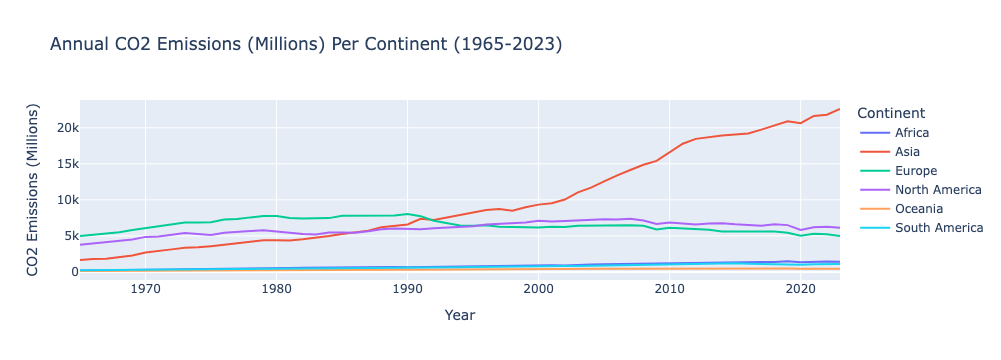

In [43]:
#Using Plotly Express Line Chart to Visualize our Analysis.
fig11 = px.line(
    df_emissions,
    x='Year',
    y='Annual CO₂ emissions',
    color='Entity',
    title='Annual CO2 Emissions (Millions) Per Continent (1965-2023)',
    labels={
        'Year': 'Year',
        'Annual CO₂ emissions': 'CO2 Emissions (Millions)',
        'Entity': 'Continent'
    })

#Show the graph
fig11.show()